# GROUP 5 DATACAMP PROJECT (II)

https://app.datacamp.com/learn/competitions/python-scholarship-2022

## PREDICTION OF CO2 EMISSIONS WITH MACHINE LEARNING

- This project consists of some Exploratory Data Analysis(EDA), Visualization and building a Machine learning model.

### Your challenge
**Create a report that answers the following two challenges:**
- *~Challenge I*~: Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:
- What is the median engine size in liters?
- What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?
- What is the correlation between fuel consumption and CO2 emissions?
- Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?
- What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
- Any other insights you found during your analysis?
- *~Challenge II*~: Help your team leader understand your company's products. Include:
- What is the most expensive item your company sells? The least expensive?
- How many different products of each category does your company sell?
- What are the top three brands with the highest average list price? The top three categories?
- Predict CO2 Emissions using Machine Learning model.
- Any other insights you found during your analysis?

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt

In [2]:
#location of the dataset to be used
path = '/Users/apple/Desktop/TECH4DEV/DATA PROJECTS/MY2022 Fuel Consumption Ratings (1).csv'

In [3]:
#data could not be read using pd.read_csv straight up, 
#so we opted for the encoding method before reading the data
import chardet
with open(path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [4]:
#we read the data and store it as variable cars
cars = pd.read_csv(path, encoding='Windows-1252')
pd.set_option('display.max_columns',222)
pd.set_option('expand_frame_repr', True)

cars

/var/folders/tc/v8tlbnf5669667wd62gt4w0w0000gn/T/ipykernel_30226/2085830683.py:2: DtypeWarning: Columns (0,1,2,3,4,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  cars = pd.read_csv(path, encoding='Windows-1252')


,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33,200,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Let's do some cleaning!

In [5]:
#checking for info of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Columns: 222 entries, Model to Unnamed: 221
dtypes: float64(208), object(14)
memory usage: 11.3+ MB


In [6]:
# checking for a summary of the description of the dataset
cars.describe()

,Cylinders,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221
count,955.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5.684817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#checking for a random row
cars.sample(n=1)

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2,Smog,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221
5507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### NOTES
- After looking through the dataset, we decided to select the columns that are named and   have non-null values.
- Smog rating and CO2 rating columns were dropped as we were not required to perform
  analysis on them after reading through the question.
- They are also dependent on CO2 Emissions, so they wont be used in our machine learning
  prediction.

In [8]:
#selecting the columns without non-null values and named columns
cars = cars.loc[:,['Make','Vehicle Class','Engine Size','Cylinders','Transmission','Fuel',
            'Fuel Consumption','CO2 Emissions']]
cars.head()

# we can also use cars.loc[:,:15]

,Make,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,CO2 Emissions
0,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),(g/km)
1,Acura,Compact,2.4,4.0,AM8,Z,9.9,200
2,Acura,SUV: Small,3.5,6.0,AS10,Z,12.6,263
3,Acura,SUV: Small,2.0,4.0,AS10,Z,11.0,232
4,Acura,SUV: Small,2.0,4.0,AS10,Z,11.3,242


In [9]:
#dropping the first row since it contains the units of the columns
cars.drop(0,inplace = True)

In [10]:
#calling the dataset without the unit row
cars

,Make,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,CO2 Emissions
1,Acura,Compact,2.4,4.0,AM8,Z,9.9,200
2,Acura,SUV: Small,3.5,6.0,AS10,Z,12.6,263
3,Acura,SUV: Small,2.0,4.0,AS10,Z,11.0,232
4,Acura,SUV: Small,2.0,4.0,AS10,Z,11.3,242
5,Acura,Compact,2.0,4.0,AS10,Z,11.2,230
...,...,...,...,...,...,...,...,...
6676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#dropping all null values in the dataset
cars.dropna(axis = 0,inplace = True)

cars

,Make,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,CO2 Emissions
1,Acura,Compact,2.4,4.0,AM8,Z,9.9,200
2,Acura,SUV: Small,3.5,6.0,AS10,Z,12.6,263
3,Acura,SUV: Small,2.0,4.0,AS10,Z,11.0,232
4,Acura,SUV: Small,2.0,4.0,AS10,Z,11.3,242
5,Acura,Compact,2.0,4.0,AS10,Z,11.2,230
...,...,...,...,...,...,...,...,...
951,Volvo,SUV: Small,2.0,4.0,AS8,Z,10.7,219
952,Volvo,SUV: Small,2.0,4.0,AS8,Z,10.5,219
953,Volvo,SUV: Small,2.0,4.0,AS8,Z,11.0,232
954,Volvo,SUV: Standard,2.0,4.0,AS8,Z,11.5,236


In [12]:
#checking the info of the dataset after dropping null values
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 1 to 955
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              955 non-null    object 
 1   Vehicle Class     955 non-null    object 
 2   Engine Size       955 non-null    object 
 3   Cylinders         955 non-null    float64
 4   Transmission      955 non-null    object 
 5   Fuel              955 non-null    object 
 6   Fuel Consumption  955 non-null    object 
 7   CO2 Emissions     955 non-null    object 
dtypes: float64(1), object(7)
memory usage: 67.1+ KB


In [13]:
#converting numerical columns with dtype objects to float
cars = cars.astype({'Engine Size':'float','Fuel Consumption':'float','CO2 Emissions':'float'})

#checking info of the converted columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 1 to 955
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              955 non-null    object 
 1   Vehicle Class     955 non-null    object 
 2   Engine Size       955 non-null    float64
 3   Cylinders         955 non-null    float64
 4   Transmission      955 non-null    object 
 5   Fuel              955 non-null    object 
 6   Fuel Consumption  955 non-null    float64
 7   CO2 Emissions     955 non-null    float64
dtypes: float64(4), object(4)
memory usage: 67.1+ KB


## 💪 Challenge I
Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?


###### 1. What is the median engine size in liters?

In [14]:
med_EngSize = cars['Engine Size'].median()
print('The median engine size is :' ,med_EngSize,'litres')

The median engine size is : 3.0 litres


##### 2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?

In [15]:
#a.
cars.groupby('Fuel')[['Fuel Consumption']].mean()

,Fuel Consumption
Fuel,
D,11.282143
E,19.864286
X,11.243274
Z,13.651392


In [16]:
#b.
#selecting dataframe with fuel type of regular gasoline(X) 
carsX = cars.loc[cars['Fuel']== 'X']

#finding the average fuel consumption of regular gasoline(X)
cars_fcX = carsX['Fuel Consumption'].mean()
print('The average fuel consumption for regular gasoline(X) is:',cars_fcX,'L/100km')


The average fuel consumption for regular gasoline(X) is: 11.243273542600894 L/100km


In [17]:

#selecting dataframe with fuel type of premium gasoline(Z) 
cars_Z = cars.loc[cars['Fuel']== 'Z']

#average fuel consumption of premium gasoline(Z)
cars_fcZ = cars_Z['Fuel Consumption'].mean()
print('The average fuel consumption for premium gasoline(Z) is:',cars_fcZ,'L/100km')

The average fuel consumption for premium gasoline(Z) is: 13.651391862955037 L/100km


In [18]:
#Checking if we can find the above with one line of code 
cars.loc[cars['Fuel']=='Z']['Fuel Consumption'].mean()

#it worked!

13.651391862955037

In [19]:
#selecting dataframe with fuel type of Ethanol(E)
carsE = cars.loc[cars['Fuel']=='E']

#average fuel consumption of Ethanol(E)
cars_fcE = carsE['Fuel Consumption'].mean()
print('The average fuel consumption for regular gasoline(E) is:',cars_fcE,'L/100km')

The average fuel consumption for regular gasoline(E) is: 19.86428571428571 L/100km


In [20]:
#selecting Dataframe with fuel type of Diesel(D)
carsD = cars.loc[cars['Fuel']=='D']

#average fuel consumption of Diesel(D)
cars_fcD = carsD['Fuel Consumption'].mean()
print('The average fuel consumption for regular gasoline(D) is:',cars_fcD,'L/100km')

The average fuel consumption for regular gasoline(D) is: 11.282142857142857 L/100km


##### 3. What is the correlation between fuel consumption and CO2 emissions?

In [21]:
#a
print('The correlation between fuel consumption and CO2 Emissions is:',
      cars['Fuel Consumption'].corr(cars['CO2 Emissions']))

The correlation between fuel consumption and CO2 Emissions is: 0.9657753305904868


<AxesSubplot:xlabel='Fuel Consumption', ylabel='CO2 Emissions'>

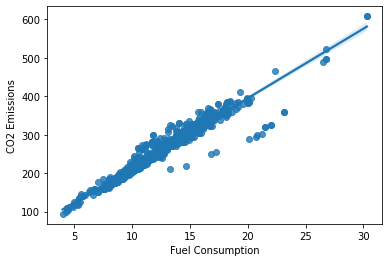

In [22]:
#plotting this correlation- SCATTER PLOT
sns.regplot(x ='Fuel Consumption',y ='CO2 Emissions',data = cars)

In [23]:
print('There is a positive linear correlation between Fuel Consumption and CO2 Emissions')

There is a positive linear correlation between Fuel Consumption and CO2 Emissions


In [24]:
#b
# USING A HEAT MAP TO SHOW THE CORRELATION
Correlation = cars.loc[:,['Fuel Consumption','CO2 Emissions']].corr()
Correlation

,Fuel Consumption,CO2 Emissions
Fuel Consumption,1.000000,0.965775
CO2 Emissions,0.965775,1.000000


<AxesSubplot:>

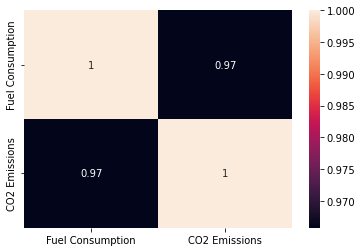

In [25]:
#visualizing the correlation using heatmaps
sns.heatmap(data = Correlation, annot = True)

##### 4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

In [26]:
#locating cars of vehicle class 'SUV-SMALL'
cars_SuvSmall = cars.loc[cars['Vehicle Class']== 'SUV: Small']

#average CO2 Emissions for 'SUV-SMALL'
CO2E_SuvSmall = cars_SuvSmall['CO2 Emissions'].mean()

#locating cars of vehicle class 'MID-SIZE'
cars_MidSize = cars.loc[cars['Vehicle Class']=='Mid-size']

#average CO2 Emissions for 'MID-SIZE'
CO2E_MidSize = cars_MidSize['CO2 Emissions'].mean()
print('The average CO2 Emissions for SUV-SMALL is:',CO2E_SuvSmall,'and MID-SIZE is:',CO2E_MidSize)

if CO2E_SuvSmall > CO2E_MidSize:
    print('Mid Size Vehicle class has a lower average')
elif CO2E_MidSize > CO2E_SuvSmall:
    print('SUV small Vehicle class has a lower average')
else:
    print('Both Vehicle class have the same average CO2 Emission')


The average CO2 Emissions for SUV-SMALL is: 229.85786802030458 and MID-SIZE is: 229.5042735042735
Mid Size Vehicle class has a lower average


In [27]:
#plotting the average CO2 Emissions
data = {'VehicleClass':['SUV: Small','Mid-size'],'CO2Emissions':[CO2E_SuvSmall,CO2E_MidSize]}
df = pd.DataFrame(data)
df

,VehicleClass,CO2Emissions
0,SUV: Small,229.857868
1,Mid-size,229.504274


<AxesSubplot:xlabel='VehicleClass', ylabel='CO2Emissions'>

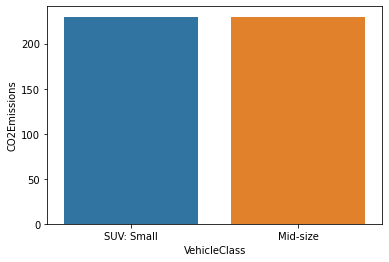

In [28]:
sns.barplot(x = 'VehicleClass',y = 'CO2Emissions',data = df)

##### 5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

In [29]:
#locate cars with an Engine size of 2.0 litres or less
cars_EngineSize2 = cars.loc[cars['Engine Size']<= 2]

#average CO2 Emissions of cars_EngineSize2
CO2E_EngineSize2 = cars_EngineSize2['CO2 Emissions'].mean()
print('The average CO2 Emissions for vehicles with an engine size of 2.0 litres or smaller is',
     CO2E_EngineSize2)

The average CO2 Emissions for vehicles with an engine size of 2.0 litres or smaller is 201.48464163822527


##### 6. Any other insights you found during your analysis?
- Exploring data further to derive any other insghts.

In [30]:
#renaming columns
carsNew = cars.rename(columns = {'Vehicle Class':'Vehicle_class','Engine Size':'Engine_size',
                                'Fuel Consumption':'Fuel_consumption','CO2 Emissions':'CO2_Emissions'})
carsNew

,Make,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel,Fuel_consumption,CO2_Emissions
1,Acura,Compact,2.4,4.0,AM8,Z,9.9,200.0
2,Acura,SUV: Small,3.5,6.0,AS10,Z,12.6,263.0
3,Acura,SUV: Small,2.0,4.0,AS10,Z,11.0,232.0
4,Acura,SUV: Small,2.0,4.0,AS10,Z,11.3,242.0
5,Acura,Compact,2.0,4.0,AS10,Z,11.2,230.0
...,...,...,...,...,...,...,...,...
951,Volvo,SUV: Small,2.0,4.0,AS8,Z,10.7,219.0
952,Volvo,SUV: Small,2.0,4.0,AS8,Z,10.5,219.0
953,Volvo,SUV: Small,2.0,4.0,AS8,Z,11.0,232.0
954,Volvo,SUV: Standard,2.0,4.0,AS8,Z,11.5,236.0


In [31]:
# checking for unique values
cars_make = cars.Make.unique()
print(cars_make)

#the number of unique values
print(len(cars_make))

['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bentley' 'BMW' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'FIAT' 'Ford' 'Genesis'
 'GMC' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini'
 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda' 'Mercedes-Benz' 'MINI'
 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce' 'Subaru' 'Toyota'
 'Volkswagen' 'Volvo']
39


In [32]:
#see how each make of the cars consume fuel
carsNew.groupby(['Make']).Fuel_consumption.agg([len,min,max]).sort_values(by = ['max'],ascending = False)

,len,min,max
Make,,,
Bugatti,3,26.8,30.3
Lamborghini,8,18.0,26.8
Chevrolet,80,7.7,23.1
GMC,54,9.2,23.1
Ram,16,10.4,22.4
Ford,90,5.4,21.2
Bentley,8,14.9,20.3
Rolls-Royce,7,19.9,20.1
Mercedes-Benz,51,9.5,19.3


In [33]:
carsNew.groupby(['Make','Fuel_consumption']).CO2_Emissions.agg([len,min,max]).sort_values(by = ['max'],
                                                                                             ascending = False)

len    min    max
Make        Fuel_consumption                   
Bugatti     30.3                2  608.0  608.0
            26.8                1  522.0  522.0
Lamborghini 26.8                2  498.0  498.0
            26.5                1  489.0  489.0
Ram         22.4                1  465.0  465.0
...                           ...    ...    ...
Kia         4.4                 2  110.0  110.0
Toyota      4.4                 2  106.0  106.0
Hyundai     4.5                 1  103.0  103.0
            4.3                 1   99.0   99.0
            4.0                 1   94.0   94.0

[653 rows x 3 columns]

##### INSIGHTS
- A bugatti consumes the most fuel, while a Jeep consumes the least
- Also, I also established a fact that although there's a correlation between a vehicle's
  fuel consumption and its CO2 Emission, other factors should be considered

In [34]:
#let's check if the vehicle class has anything to do with the CO2 Emission
carsNew.groupby(['Make','Vehicle_class','Fuel_consumption']).CO2_Emissions.agg([len,max]).sort_values(by = ['max'],
                                                                                             ascending = False)

len    max
Make        Vehicle_class          Fuel_consumption            
Bugatti     Two-seater             30.3                2  608.0
                                   26.8                1  522.0
Lamborghini Two-seater             26.8                2  498.0
                                   26.5                1  489.0
Ram         Pickup truck: Standard 22.4                1  465.0
...                                                  ...    ...
Toyota      Mid-size               4.4                 1  106.0
            Compact                4.4                 1  106.0
Hyundai     Mid-size               4.5                 1  103.0
            Full-size              4.3                 1   99.0
                                   4.0                 1   94.0

[770 rows x 2 columns]

##### INSIGHTS
- Vehicle class does not affect the vehicle's CO2 Emissions

In [35]:
# X(regular gasoine),Z(premium gasoline),E(ethanol),D(Diesel)
carsNew.groupby(['Make','Fuel']).CO2_Emissions.agg([len,min,max]).sort_values(by = ['max'],ascending = False)

,,len,min,max
Make,Fuel,,,
Bugatti,Z,3,522.0,608.0
Lamborghini,Z,8,370.0,498.0
Ram,Z,1,465.0,465.0
Mercedes-Benz,Z,51,194.0,412.0
Ford,Z,2,392.0,395.0
...,...,...,...,...
Mitsubishi,X,7,143.0,218.0
Volvo,X,1,217.0,217.0
MINI,Z,20,170.0,212.0


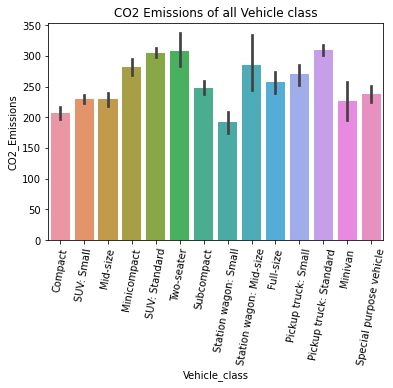

In [36]:
#visualizing how each vehicle class gives off CO2 Emissions using a barplot
sns.barplot(x='Vehicle_class',y = 'CO2_Emissions',data = carsNew)
plt.xticks(rotation = 80)
plt.title('CO2 Emissions of all Vehicle class')
plt.show()

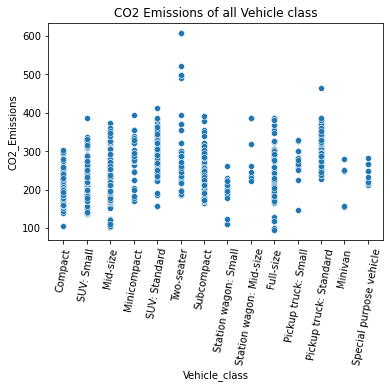

In [37]:
#visualizing how each vehicle class gives off CO2 Emissions using a scatterplot
sns.scatterplot(x='Vehicle_class',y = 'CO2_Emissions',data = carsNew)
plt.xticks(rotation = 80)
plt.title('CO2 Emissions of all Vehicle class')
plt.show()

- This shows that the vehicle class is not the only determining factor of how much CO2 is being discharged. It combines other factors to be able to determine that.

<AxesSubplot:xlabel='Fuel', ylabel='CO2_Emissions'>

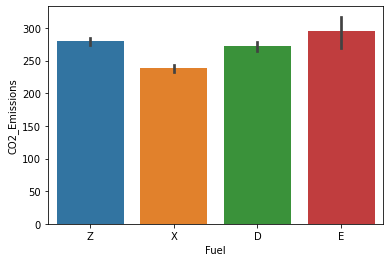

In [38]:
#visualizing how each fuel gives off CO2 Emissions using a barplot
sns.barplot(x='Fuel',y='CO2_Emissions',data=carsNew)

<AxesSubplot:xlabel='Fuel', ylabel='CO2_Emissions'>

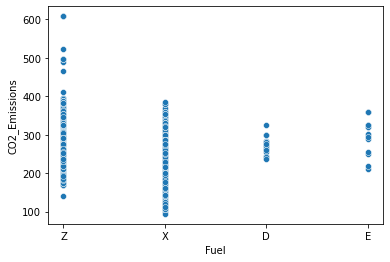

In [39]:
#visualizing how each fuel gives off CO2 Emissions using a scatterplot
sns.scatterplot(x='Fuel',y='CO2_Emissions',data=carsNew)

# MACHINE LEARNING

- Looking at our dataset, we want to be able to predict CO2 Emissions given some features. We use a Linear Regression since CO2 Emissions is a continuous variable.

Let's Go!

## LINEAR REGRESSION

In [40]:
#calling out the first 5 rows
carsNew.head()

,Make,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel,Fuel_consumption,CO2_Emissions
1,Acura,Compact,2.4,4.0,AM8,Z,9.9,200.0
2,Acura,SUV: Small,3.5,6.0,AS10,Z,12.6,263.0
3,Acura,SUV: Small,2.0,4.0,AS10,Z,11.0,232.0
4,Acura,SUV: Small,2.0,4.0,AS10,Z,11.3,242.0
5,Acura,Compact,2.0,4.0,AS10,Z,11.2,230.0


In [41]:
#selecting our prediction target(y)
y = carsNew.CO2_Emissions

In [42]:
#selecting features(x)
cars_features = ['Engine_size','Cylinders','Fuel_consumption']
X = carsNew[cars_features]
X

,Engine_size,Cylinders,Fuel_consumption
1,2.4,4.0,9.9
2,3.5,6.0,12.6
3,2.0,4.0,11.0
4,2.0,4.0,11.3
5,2.0,4.0,11.2
...,...,...,...
951,2.0,4.0,10.7
952,2.0,4.0,10.5
953,2.0,4.0,11.0
954,2.0,4.0,11.5


#### MODEL BUILDING
we use scikit-learn(sklearn) library

The steps in building a model are **'DTFPE'**:
1. define your obj,what type of data is your label
2. train/fit: capture the pattern in the train data
3. predict: predict using the test data
4. Evaluate: evaluate the accuracy of your model

- a. The label is a continuous variable(data)
- b. We can divide our data into train and test data(75% train, 25%test)
- c. we predict using test data
- d. Evaluate with evaluation metrics

In [43]:
#Now, we split our data into train data and test data
#importing functions from sklearn to help split the data
from sklearn.model_selection import train_test_split

In [44]:
#splitting the data
X_train, X_test,y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.25, random_state = 1)

In [45]:
#checking out the train data
X_train

,Engine_size,Cylinders,Fuel_consumption
938,2.0,4.0,9.1
641,2.5,4.0,10.8
157,3.0,6.0,12.8
683,2.0,4.0,10.7
413,1.5,4.0,9.2
...,...,...,...
768,2.0,4.0,11.7
73,2.0,4.0,10.0
909,2.5,4.0,8.5
236,5.3,8.0,15.8


In [46]:
y_train

938    186.0
641    230.0
157    260.0
683    217.0
413    202.0
       ...  
768    245.0
73     202.0
909    180.0
236    327.0
38     273.0
Name: CO2_Emissions, Length: 716, dtype: float64

In [47]:
#import libraries considering the type of data we have/trying to predict
#our label is a continous data/variable
from sklearn.linear_model import LinearRegression

#then we define our model
Emissions_model = LinearRegression()

In [48]:
#we then fit the model
lr = Emissions_model.fit(X_train,y_train)
lr

LinearRegression()

In [49]:
#determining the coefficient(slope) of our fit
Emissions_model.coef_

array([ 1.22741546,  1.92923968, 16.6582223 ])

In [50]:
#determining the intercept
Emissions_model.intercept_

35.80912015530316

In [51]:
#now we predict using the test data
prediction = Emissions_model.predict(X_test)

#storing our prediction in a dataframe
Emissions_predict = pd.DataFrame(prediction, columns = ['CO2_Emiss_predict'])
Emissions_predict

,CO2_Emiss_predict
0,342.042793
1,293.347477
2,320.948252
3,285.018366
4,361.332079
...,...
234,281.459485
235,338.537402
236,118.786122
237,355.562294


In [52]:
#creating a random feature for testing
df_car = pd.DataFrame([[4.0,1.2,7.2]], columns = ['Engine_size','Cylinders','Fuel_consumption'])
df_car

,Engine_size,Cylinders,Fuel_consumption
0,4.0,1.2,7.2


In [53]:
#predicting the CO2 Emission for the above features
Emissions_model.predict(df_car)

array([162.97307018])

In [54]:
#using equation of line to predict
#Equation of line: y = mx + c
# y = (1.22741546*x1) + (1.92923968*x2) + (16.6582223x3) + 35.80912015530316

In [55]:
a = (1.22741546 * 4) + (1.92923968 * 1.2) + (16.6582223 * 7.2) + 35.80912015530316
a     

162.97307017130316

- It gives us the same answer

In [56]:
#checking to see how the predicted values differ from the actual values
#making a copy of the X_test data
X_test1 = X_test.copy()

#adding the y_test and predicted data to the X_test data copy
X_test1['Actual_C02Emiss'] = y_test
X_test1['Predicted_CO2Emiss'] = prediction

#calling our new X_test
X_test1

,Engine_size,Cylinders,Fuel_consumption,Actual_C02Emiss,Predicted_CO2Emiss
242,6.2,8.0,17.0,353.0,342.042793
847,3.6,6.0,14.5,295.0,293.347477
416,5.3,8.0,15.8,327.0,320.948252
386,3.6,6.0,14.0,283.0,285.018366
564,5.2,10.0,18.0,371.0,361.332079
...,...,...,...,...,...
843,5.7,8.0,13.4,284.0,281.459485
17,5.2,12.0,16.4,324.0,338.537402
542,1.6,4.0,4.4,110.0,118.786122
580,5.0,8.0,17.9,365.0,355.562294


Text(0, 0.5, 'Predicted values')

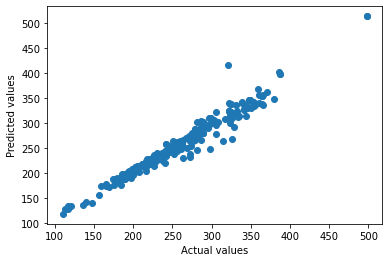

In [57]:
#plotting how close the predicted and actual values are
plt.scatter(y_test, prediction)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0, 0.5, 'Predicted values')

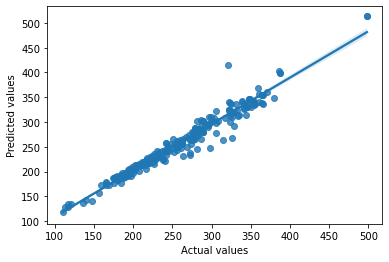

In [58]:
#adding a regression line to the plot
sns.regplot(x = y_test, y = prediction)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#### MODEL EVALUATION

- Using the following evaluation metrics to check if the model is a good fit
1. R (measure of correlation)
2. R^2(coefficient of determination)
3. MSE(Mean square error)
4. MAE(Mean absolute error)

In [59]:
#Linear regression training and test score
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print(f'Train score : {train_score:.3f}')
print(f'Test score : {test_score:.3f}')

Train score : 0.926
Test score : 0.954


In [60]:
#importing libraries
from scipy.stats import pearsonr
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

- This model is a good fit i.e it has a good accuracy on both the train data and test data. It doesn't overfit, neither does it underfit

In [61]:
corr,_ = pearsonr(y_test,prediction)
print('The Pearsons correlation(R) is: ',corr)

The Pearsons correlation(R) is:  0.9772236520475377


In [62]:
#1. R^2(coefficient of determination)
print('The Coefficient of Determination(R2) score is:' ,r2_score(y_test, prediction))

The Coefficient of Determination(R2) score is: 0.9540584039415309


In [63]:
#2. MAE(Mean Absolute Error)
print('The Mean Absolute Error(MAE) is:',mean_absolute_error(y_test, prediction))

The Mean Absolute Error(MAE) is: 9.39863930935432


In [64]:
#3. MSE(Mean Squared Error)
print('The Mean Squared Error(MSE) is:',mean_squared_error(y_test, prediction))

The Mean Squared Error(MSE) is: 196.18459847858762


In [65]:
print('The Mean Squared Error(MSE) is:',mean_squared_error(y_test, prediction,squared = False))

The Mean Squared Error(MSE) is: 14.00659125121411


- From the above algorithm and the evaluation metrics used, it shows us that the model is a good fit.

### METHOD 2 (After feature scaling)
- We decided to scale to check for any improvements in our model

In [66]:
#calling the features
X

,Engine_size,Cylinders,Fuel_consumption
1,2.4,4.0,9.9
2,3.5,6.0,12.6
3,2.0,4.0,11.0
4,2.0,4.0,11.3
5,2.0,4.0,11.2
...,...,...,...
951,2.0,4.0,10.7
952,2.0,4.0,10.5
953,2.0,4.0,11.0
954,2.0,4.0,11.5


In [67]:
features = X.to_numpy()
features

array([[ 2.4,  4. ,  9.9],
       [ 3.5,  6. , 12.6],
       [ 2. ,  4. , 11. ],
       ...,
       [ 2. ,  4. , 11. ],
       [ 2. ,  4. , 11.5],
       [ 2. ,  4. , 12.4]])

In [68]:
#using min_max_scaler to scale
#import libraries
from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
scaled_features = min_max_scaler.fit_transform(features)
scaled_features

array([[0.17647059, 0.07692308, 0.2243346 ],
       [0.33823529, 0.23076923, 0.3269962 ],
       [0.11764706, 0.07692308, 0.2661597 ],
       ...,
       [0.11764706, 0.07692308, 0.2661597 ],
       [0.11764706, 0.07692308, 0.2851711 ],
       [0.11764706, 0.07692308, 0.31939163]])

In [69]:
#storing the scaled variables
X[['Engine_size','Cylinders','Fuel_consumption']] = scaled_features
X

/var/folders/tc/v8tlbnf5669667wd62gt4w0w0000gn/T/ipykernel_30226/2381245675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Engine_size','Cylinders','Fuel_consumption']] = scaled_features


,Engine_size,Cylinders,Fuel_consumption
1,0.176471,0.076923,0.224335
2,0.338235,0.230769,0.326996
3,0.117647,0.076923,0.266160
4,0.117647,0.076923,0.277567
5,0.117647,0.076923,0.273764
...,...,...,...
951,0.117647,0.076923,0.254753
952,0.117647,0.076923,0.247148
953,0.117647,0.076923,0.266160
954,0.117647,0.076923,0.285171


In [70]:
y

1      200.0
2      263.0
3      232.0
4      242.0
5      230.0
       ...  
951    219.0
952    219.0
953    232.0
954    236.0
955    252.0
Name: CO2_Emissions, Length: 955, dtype: float64

In [71]:
#let's split the data now
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                 test_size = 0.3,random_state = 101)
X_train.shape

(668, 3)

In [72]:
#number of rows and columns in test data
X_test.shape

(287, 3)

In [73]:
#define the model
lr = LinearRegression()

#train and fit the model
lr_model = lr.fit(X_train,y_train)
lr_model

LinearRegression()

In [74]:
#coefficient of the model
lr_model.coef_

array([ 10.45628811,  10.0444862 , 454.5893578 ])

In [75]:
#intercept of the model
lr_model.intercept_

107.13523459921325

In [76]:
#equation of line: y = mx + c
#y = (10.45628811*x1) + (10.0444862*x2) + (454.5893578*x3) + c

In [77]:
#let's test one:
d = (10.45628811 * 0.3 ) + (10.0444862* 0.7) + (454.5893578* 0.91) + 107.13523459921325
d

530.9795769702133

In [78]:
#let's test our model
d2 = lr_model.predict([[0.3,0.7,0.91]])
d2

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([530.97957697])

In [79]:
#predict the model
predict = lr_model.predict(X_test)
predicted = pd.DataFrame(predict, columns = ['CO2_predicted'])
predicted

,CO2_predicted
0,281.611745
1,135.834033
2,252.227642
3,360.922410
4,125.807730
...,...
282,209.389684
283,400.831141
284,222.104097
285,192.873763


In [80]:
#comparing the actual and predicted values
dataset = X_test.copy()
dataset['CO2Emiss_Actual'] = y_test
dataset['CO2Emiss_predicted'] = predict
dataset

,Engine_size,Cylinders,Fuel_consumption,CO2Emiss_Actual,CO2Emiss_predicted
811,0.264706,0.230769,0.372624,289.0,281.611745
300,0.191176,0.076923,0.057034,139.0,135.834033
128,0.264706,0.230769,0.307985,256.0,252.227642
99,0.794118,0.692308,0.524715,354.0,360.922410
544,0.058824,0.076923,0.038023,124.0,125.807730
...,...,...,...,...,...
25,0.117647,0.076923,0.220532,205.0,209.389684
851,0.808824,0.692308,0.612167,386.0,400.831141
601,0.176471,0.076923,0.247148,221.0,222.104097
908,0.191176,0.076923,0.182510,184.0,192.873763


#### EVALUATION METRICS(After feature scaling)

In [81]:
#R Score
#Linear regression training and test score
train_score = lr_model.score(X_train,y_train)
test_score = lr_model.score(X_test,y_test)
print(f'Train score:{train_score:.2f}')
print(f'Test score:{test_score:.2f}')

Train score:0.94
Test score:0.92


In [82]:
#R2 Score
from sklearn.metrics import r2_score
R2_score = r2_score(y_test, predict)
R2_score

0.9228563375401336

In [83]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predict)

10.747663509090312

In [84]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predict, squared = False)

18.047788458493706

## MODEL 2(including Categorical data)

In [85]:
#calling out our data
carsNew 

,Make,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel,Fuel_consumption,CO2_Emissions
1,Acura,Compact,2.4,4.0,AM8,Z,9.9,200.0
2,Acura,SUV: Small,3.5,6.0,AS10,Z,12.6,263.0
3,Acura,SUV: Small,2.0,4.0,AS10,Z,11.0,232.0
4,Acura,SUV: Small,2.0,4.0,AS10,Z,11.3,242.0
5,Acura,Compact,2.0,4.0,AS10,Z,11.2,230.0
...,...,...,...,...,...,...,...,...
951,Volvo,SUV: Small,2.0,4.0,AS8,Z,10.7,219.0
952,Volvo,SUV: Small,2.0,4.0,AS8,Z,10.5,219.0
953,Volvo,SUV: Small,2.0,4.0,AS8,Z,11.0,232.0
954,Volvo,SUV: Standard,2.0,4.0,AS8,Z,11.5,236.0


In [86]:
#unique values in Fuel column
carsNew['Fuel'].unique()

array(['Z', 'X', 'D', 'E'], dtype=object)

In [87]:
#unique values in Vehicle class column
carsNew.Vehicle_class.unique()

array(['Compact', 'SUV: Small', 'Mid-size', 'Minicompact',
       'SUV: Standard', 'Two-seater', 'Subcompact',
       'Station wagon: Small', 'Station wagon: Mid-size', 'Full-size',
       'Pickup truck: Small', 'Pickup truck: Standard', 'Minivan',
       'Special purpose vehicle'], dtype=object)

In [88]:
#create dummies for the categorical variables(ONE-HOT ENCODING)
dummy_fuel = pd.get_dummies(carsNew.Fuel,drop_first = True, dummy_na = False)
dummy_fuel

,E,X,Z
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
951,0,0,1
952,0,0,1
953,0,0,1
954,0,0,1


In [89]:
#create dummies for the categorical variables(ONE-HOT ENCODING)
dummy_class = pd.get_dummies(carsNew.Vehicle_class,dummy_na = False)
dummy_class

,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,SUV: Small,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0,0,0,0,0,0,0,1,0,0,0,0,0,0
952,0,0,0,0,0,0,0,1,0,0,0,0,0,0
953,0,0,0,0,0,0,0,1,0,0,0,0,0,0
954,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [90]:
#create dummies for the categorical variables(ONE-HOT ENCODING)
dummy_make = pd.get_dummies(carsNew.Make,dummy_na = False)
dummy_make

,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,Ford,GMC,Genesis,Honda,Hyundai,Infiniti,Jaguar,Jeep,Kia,Lamborghini,Land Rover,Lexus,Lincoln,MINI,Maserati,Mazda,Mercedes-Benz,Mitsubishi,Nissan,Porsche,Ram,Rolls-Royce,Subaru,Toyota,Volkswagen,Volvo
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
952,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
954,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [91]:
#create dummies for the categorical variables(ONE-HOT ENCODING)
dummy_trans = pd.get_dummies(carsNew.Transmission,dummy_na = False)
dummy_trans

,A10,A6,A7,A8,A9,AM6,AM7,AM8,AS10,AS5,AS6,AS7,AS8,AS9,AV,AV1,AV10,AV6,AV7,AV8,M5,M6,M7
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
952,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
953,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
954,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [92]:
#dropping columns that have been encoded
carsNew_ = carsNew.drop(['Make','Vehicle_class','Transmission','Fuel'],axis = 1)
carsNew_

,Engine_size,Cylinders,Fuel_consumption,CO2_Emissions
1,2.4,4.0,9.9,200.0
2,3.5,6.0,12.6,263.0
3,2.0,4.0,11.0,232.0
4,2.0,4.0,11.3,242.0
5,2.0,4.0,11.2,230.0
...,...,...,...,...
951,2.0,4.0,10.7,219.0
952,2.0,4.0,10.5,219.0
953,2.0,4.0,11.0,232.0
954,2.0,4.0,11.5,236.0


In [93]:
#concatenating the dummy columns with the numerical variables
carsNew_ = pd.concat([carsNew_,dummy_make,dummy_fuel,dummy_trans,dummy_class], axis = 1)
carsNew_

,Engine_size,Cylinders,Fuel_consumption,CO2_Emissions,Acura,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,Chrysler,Dodge,FIAT,Ford,GMC,Genesis,Honda,Hyundai,Infiniti,Jaguar,Jeep,Kia,Lamborghini,Land Rover,Lexus,Lincoln,MINI,Maserati,Mazda,Mercedes-Benz,Mitsubishi,Nissan,Porsche,Ram,Rolls-Royce,Subaru,Toyota,Volkswagen,Volvo,E,X,Z,A10,A6,A7,A8,A9,AM6,AM7,AM8,AS10,AS5,AS6,AS7,AS8,AS9,AV,AV1,AV10,AV6,AV7,AV8,M5,M6,M7,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,SUV: Small,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater
1,2.4,4.0,9.9,200.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.5,6.0,12.6,263.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2.0,4.0,11.0,232.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,4.0,11.3,242.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,2.0,4.0,11.2,230.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2.0,4.0,10.7,219.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
952,2.0,4.0,10.5,219.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
953,2.0,4.0,11.0,232.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
954,2.0,4.0,11.5,236.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [94]:
carsNew_.shape

(955, 83)

In [95]:
#defining the features and the label
X2 = carsNew_.drop(['CO2_Emissions'],axis = 1)
y2 = carsNew_['CO2_Emissions']

In [96]:
#splitting data into train and test size
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2, 
                 test_size = 0.2,random_state = 2)

In [97]:
#rows and columns of train data
X2_train.shape

(764, 82)

In [98]:
#rows and columns of test data
X2_test.shape

(191, 82)

In [99]:
#define and fit the model
cat_model = LinearRegression()
lr_cat = cat_model.fit(X2_train,y2_train)
lr_cat


LinearRegression()

In [100]:
#the coeffiecient of the model
lr_cat.coef_

array([-1.30447350e+00,  3.88554095e-02,  1.92757531e+01, -2.28144407e+11,
       -2.28144407e+11, -2.28144407e+11, -2.28144407e+11, -2.28144407e+11,
       -2.28144407e+11, -2.28144407e+11, -2.28144407e+11, -2.28144407e+11,
       -2.28144407e+11, -2.28144407e+11, -2.28144407e+11, -2.28144407e+11,
       -2.28144407e+11, -2.28144407e+11, -2.28144407e+11, -2.28144407e+11,
       -2.28144407e+11, -2.28144407e+11, -2.28144407e+11, -2.28144407e+11,
       -2.28144407e+11, -2.28144407e+11, -2.28144407e+11, -2.28144407e+11,
       -2.28144407e+11, -2.28144407e+11, -2.28144407e+11, -2.28144407e+11,
       -2.28144407e+11, -2.28144407e+11, -2.28144407e+11, -2.28144407e+11,
       -2.28144407e+11, -2.28144407e+11, -2.28144407e+11, -2.28144407e+11,
       -2.28144407e+11, -2.28144407e+11, -1.47378696e+02, -2.72687225e+01,
       -2.54139709e+01,  7.71555866e+11,  7.71555866e+11,  7.71555866e+11,
        7.71555866e+11,  7.71555866e+11,  7.71555866e+11,  7.71555866e+11,
        7.71555866e+11,  

In [101]:
#the intercept of the model
lr_cat.intercept_

-1016508939934.8188

In [102]:
#predict using our model
cat_prediction = lr_cat.predict(X2_test)
cat_prediction

array([264.21459961, 288.17700195, 308.66345215, 250.140625  ,
       261.44311523, 328.48974609, 254.9597168 , 247.90258789,
       237.03222656, 231.11486816, 271.45935059, 207.22119141,
       280.76013184, 253.66503906, 187.36474609, 291.21728516,
       179.71875   , 266.92993164, 353.37426758, 287.60571289,
       323.55712891, 228.60620117, 261.1472168 , 295.76074219,
       228.81958008, 191.1072998 , 166.05932617, 170.06201172,
       185.59887695, 281.91125488, 224.90112305, 352.29443359,
       243.14086914, 189.64575195, 268.41821289, 302.39172363,
       271.31237793, 227.38598633, 383.65600586, 398.24462891,
       219.99389648, 223.9140625 , 213.3972168 , 354.08349609,
       308.69116211, 330.78173828, 267.11206055, 162.85644531,
       346.97363281, 241.51403809, 259.84179688, 327.97802734,
       226.80834961, 387.06811523, 252.05297852, 216.26086426,
       283.50390625, 297.57080078, 389.09997559, 354.92529297,
       187.9329834 , 238.3737793 , 193.88818359, 176.00

In [103]:
y2_test

356    256.0
281    323.0
200    304.0
294    239.0
173    259.0
       ...  
647    207.0
453    271.0
841    260.0
917    158.0
505    268.0
Name: CO2_Emissions, Length: 191, dtype: float64

In [104]:
#creating an empty dataframe
cat_compare = pd.DataFrame()
cat_compare

""


In [105]:
#Adding columns to the Dataframe
cat_compare['Actual_y2'] = y2_test
cat_compare['Predicted_y2'] = cat_prediction
cat_compare

,Actual_y2,Predicted_y2
356,256.0,264.214600
281,323.0,288.177002
200,304.0,308.663452
294,239.0,250.140625
173,259.0,261.443115
...,...,...
647,207.0,208.729736
453,271.0,274.074951
841,260.0,256.340332
917,158.0,155.405762


In [106]:
#check how well the model fits the train and test data
train_score = lr_cat.score(X2_train, y2_train)
test_core = lr_cat.score(X2_test,y2_test)
print(f'Train score:{train_score:.2f}')
print(f'Test score:{test_score:.2f}')

Train score:0.99
Test score:0.92


In [107]:
#using Ridge regularization to enable the model fit better to the test data
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 0.8).fit(X2_train, y2_train)

rtraining_score = ridge.score(X2_train,  y2_train)
rtest_score = ridge.score(X2_test,  y2_test)

print(f'Linear Regression -Training set score: {rtraining_score:.2f}')
print(f'Linear Regression -Test set score: {rtest_score:.2f}')

Linear Regression -Training set score: 0.99
Linear Regression -Test set score: 0.98


In [108]:
#using Lasso regularization to enable the model fit better to the test data
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01).fit(X2_train, y2_train)

nrtraining_score = lasso.score(X2_train,  y2_train)
nrtest_score = lasso.score(X2_test,  y2_test)

print(f'Linear Regression -Training set score: {nrtraining_score:.2f}')
print(f'Linear Regression -Test set score: {nrtest_score:.2f}')


Linear Regression -Training set score: 0.99
Linear Regression -Test set score: 0.98


In [109]:
#checking for the removed features
lasso.coef_

array([-1.29232712e+00,  9.08749122e-02,  1.91464331e+01, -0.00000000e+00,
       -2.08643417e+00,  0.00000000e+00, -5.14328261e-01,  1.82003184e+00,
       -1.29105179e+00,  1.11732053e+01, -0.00000000e+00, -2.27747771e+00,
        1.82365198e+00, -2.38538706e+00, -5.29311612e+00,  4.53179112e-01,
        7.69618688e+00,  1.42203977e+00,  3.69284276e+00,  7.33761119e-01,
        1.31761241e+00, -0.00000000e+00,  1.29170592e+00, -9.93751512e-01,
        4.08199558e+00, -1.32136473e+00,  6.30736333e+00,  2.23057201e+00,
       -0.00000000e+00, -1.37555890e+00, -6.07612815e+00,  2.20024827e+00,
        2.16198630e+00, -1.18553212e+00, -1.62190542e+00,  8.54545585e+00,
       -5.05253426e+00, -4.08019535e+00, -0.00000000e+00,  2.87477923e+00,
       -1.02623176e+00, -3.69244284e+00, -1.43910797e+02, -2.55784645e+01,
       -2.40433992e+01,  4.60679477e+00,  1.97085547e+00, -0.00000000e+00,
       -2.82236242e-02, -3.11650458e+00,  2.61002483e+00, -1.22116777e+00,
        1.21194549e+00, -

In [110]:
#to display all rows in the resulting dataframe
pd.set_option('display.max_rows', 85)

In [111]:
#placing the columns each values belong to easily identify the columns that have 
#been shrinked by Lasso regularization
result = pd.DataFrame(lasso.coef_,columns = ['coeff'])
result.index += 1
result['columns'] = X2.columns
result

,coeff,columns
1,-1.292327,Engine_size
2,0.090875,Cylinders
3,19.146433,Fuel_consumption
4,-0.000000,Acura
5,-2.086434,Alfa Romeo
6,0.000000,Aston Martin
7,-0.514328,Audi
8,1.820032,BMW
9,-1.291052,Bentley
10,11.173205,Bugatti


In [112]:
#calling out the columns with zero coefficient
result.loc[result['coeff'] == 0]

,coeff,columns
4,-0.0,Acura
6,0.0,Aston Martin
11,-0.0,Buick
22,-0.0,Infiniti
29,-0.0,Lincoln
39,-0.0,Subaru
48,-0.0,A7
61,0.0,AV1
62,-0.0,AV10
64,0.0,AV7


In [113]:
X2.columns

Index(['Engine_size', 'Cylinders', 'Fuel_consumption', 'Acura', 'Alfa Romeo',
       'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Bugatti', 'Buick',
       'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ford', 'GMC',
       'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia',
       'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'MINI', 'Maserati',
       'Mazda', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'Ram',
       'Rolls-Royce', 'Subaru', 'Toyota', 'Volkswagen', 'Volvo', 'E', 'X', 'Z',
       'A10', 'A6', 'A7', 'A8', 'A9', 'AM6', 'AM7', 'AM8', 'AS10', 'AS5',
       'AS6', 'AS7', 'AS8', 'AS9', 'AV', 'AV1', 'AV10', 'AV6', 'AV7', 'AV8',
       'M5', 'M6', 'M7', 'Compact', 'Full-size', 'Mid-size', 'Minicompact',
       'Minivan', 'Pickup truck: Small', 'Pickup truck: Standard',
       'SUV: Small', 'SUV: Standard', 'Special purpose vehicle',
       'Station wagon: Mid-size', 'Station wagon: Small', 'Subcompact',
       'Two-seater'],
      dtype='objec

- The above shows that our model is a good fit because it doesn't suffer from both underfitting and overfitting.

In [114]:
carsNew.head()

,Make,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel,Fuel_consumption,CO2_Emissions
1,Acura,Compact,2.4,4.0,AM8,Z,9.9,200.0
2,Acura,SUV: Small,3.5,6.0,AS10,Z,12.6,263.0
3,Acura,SUV: Small,2.0,4.0,AS10,Z,11.0,232.0
4,Acura,SUV: Small,2.0,4.0,AS10,Z,11.3,242.0
5,Acura,Compact,2.0,4.0,AS10,Z,11.2,230.0


In [115]:
#checking to see if there is any correlation between the columns that were shrinked
carsNew.loc[carsNew['Make']== 'Acura']

,Make,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel,Fuel_consumption,CO2_Emissions
1,Acura,Compact,2.4,4.0,AM8,Z,9.9,200.0
2,Acura,SUV: Small,3.5,6.0,AS10,Z,12.6,263.0
3,Acura,SUV: Small,2.0,4.0,AS10,Z,11.0,232.0
4,Acura,SUV: Small,2.0,4.0,AS10,Z,11.3,242.0
5,Acura,Compact,2.0,4.0,AS10,Z,11.2,230.0
6,Acura,Compact,2.0,4.0,AS10,Z,11.3,231.0
7,Acura,Compact,3.0,6.0,AS10,Z,12.3,256.0
8,Acura,Compact,3.0,6.0,AS10,Z,12.3,261.0


In [116]:
carsNew.loc[carsNew['Make']== 'Aston Martin']

,Make,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel,Fuel_consumption,CO2_Emissions
15,Aston Martin,Minicompact,4.0,8.0,A8,Z,13.0,271.0
16,Aston Martin,Minicompact,5.2,12.0,A8,Z,16.4,324.0
17,Aston Martin,Minicompact,5.2,12.0,A8,Z,16.4,324.0
18,Aston Martin,SUV: Standard,4.0,8.0,A9,Z,16.8,343.0
19,Aston Martin,Two-seater,4.0,8.0,A8,Z,13.1,270.0


In [117]:
carsNew.loc[carsNew['Make']== 'Alfa Romeo']

,Make,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel,Fuel_consumption,CO2_Emissions
9,Alfa Romeo,Mid-size,2.0,4.0,A8,Z,10.0,205.0
10,Alfa Romeo,Mid-size,2.0,4.0,A8,Z,10.5,217.0
11,Alfa Romeo,Mid-size,2.9,6.0,A8,Z,13.5,271.0
12,Alfa Romeo,SUV: Small,2.0,4.0,A8,Z,10.3,218.0
13,Alfa Romeo,SUV: Small,2.0,4.0,A8,Z,10.8,226.0
14,Alfa Romeo,SUV: Small,2.9,6.0,A8,Z,13.9,288.0


In [118]:
carsNew.loc[carsNew['Make']== 'Bentley']

,Make,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel,Fuel_consumption,CO2_Emissions
64,Bentley,SUV: Standard,4.0,8.0,AS8,Z,15.8,309.0
65,Bentley,SUV: Standard,6.0,12.0,AS8,Z,19.0,383.0
66,Bentley,Subcompact,4.0,8.0,AM8,Z,14.9,287.0
67,Bentley,Subcompact,6.0,12.0,AM8,Z,19.6,379.0
68,Bentley,Minicompact,4.0,8.0,AM8,Z,15.2,294.0
69,Bentley,Minicompact,6.0,12.0,AM8,Z,20.3,395.0
70,Bentley,Mid-size,4.0,8.0,AM8,Z,15.5,323.0
71,Bentley,Mid-size,6.0,12.0,AM8,Z,19.2,373.0


- we didn't visually see any correlations(ask the facilitator questions on this)

Text(0, 0.5, 'Predicted values')

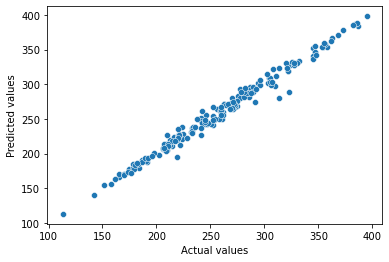

In [119]:
#plotting(visualizing) the actual and predicted values
sns.scatterplot(x = 'Actual_y2',y = 'Predicted_y2',data = cat_compare)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

<AxesSubplot:xlabel='Actual_y2', ylabel='Predicted_y2'>

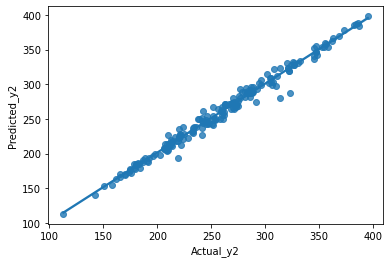

In [120]:
sns.regplot(x = 'Actual_y2',y = 'Predicted_y2',data = cat_compare)

- The scatter plots show that there is a direct linear relationship between the actual values and predicted values

#### EVALUATION METRICS FOR CATEGORICAL DATA

#### RESIDUAL PLOT

##### The first metric is to draw the residual plot. You can only move on to check other metrics if the residual plot.

##### The residual plot is drawn using a scatter plot taking the residuals as the y-axis and the predicted values as the axis while it is drawn using the sns.residplot taking x as the the independent variable and y as the dependent variable.

##### Characteristics of a good residual plot:
- It is independent and normally distributed
- A certain pattern cannot be observed, that is to say, it is random. 

In [121]:
#Using the residual plot metric
residuals = y2_test - cat_prediction

Text(0, 0.5, 'Actual values')

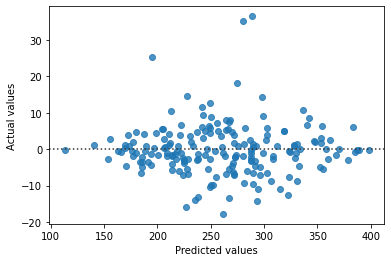

In [122]:
sns.residplot(x = 'Predicted_y2', y = 'Actual_y2', data = cat_compare)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

This is a good residual plot, we can now move to other evaluation metrics.

#### R2 Score

##### The lowest possible value of R^2 is 0 and the highest possible value is 1. Therefore, the better a model is at making predictions, the closer the closer its R^2 value will be to 1.

##### Drawing a graph can give you a clue as to whether the R^2 value is high or low. 

##### Now let's evaluate our model using the R^2 evaluation metric.

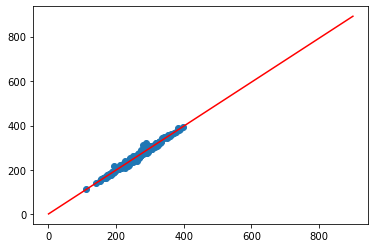

In [123]:
myline = np.linspace(1,900,50)
mymodel = np.poly1d(np.polyfit(cat_prediction,y2_test,1))
plt.scatter(cat_prediction,y2_test)
plt.plot(myline,mymodel(myline),color = 'red')
plt.show()

In [124]:
#R2 SCORE
cat_r2_score = r2_score(y2_test, cat_prediction)
cat_r2_score

0.984103129715471

In [125]:
#MEAN ABSOLUTE ERROR
cat_mae = mean_absolute_error(y2_test, cat_prediction)
cat_mae

5.123994677478731

In [126]:
#MEAN SQAURED ERROR
cat_mse = mean_squared_error(y2_test, cat_prediction)
cat_mse

52.146866885389336

In [127]:
#ROOT MEAN SQUARE
cat_mse = mean_squared_error(y2_test, cat_prediction,squared = False)
cat_mse

7.221278756936983

### CONCLUSION

From the machine learning model, we come to a conclusion that:
   - We got a better model after including the categorical data in our features and scaling   the features.
   - There was no case of overfitting or underfitting (but we sought for a better model by regularizing) which means our model is a good fit for both train and test data(no high variance, no bias).
